# **<font face = "Times New Roman" color = "cyan">Objectives of the Project</font>**

**1. Comparing the status of the Companies pre-covid and post-covid**

**2. Pulling out key figures from the data set**

**3. Segregating companies based on the market capitalisation**

**4. Comparing the top 10 companies overall by visual representation**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline



<font color = "orange" size = 7 face = "Times New Roman">Reading the data and parsing it.</font>

> **[Source of the Data](https://www.kaggle.com/datasets/ramjasmaurya/et-top-500-indian-companies-since-2009?resource=download)**

In [2]:
economic_times = pd.read_csv("C:/Users/leste/OneDrive/Desktop/Python files/mypythonprogrammes/Mydatafiles/Economic times Top 500 companies since 2009 - 2009-2021 - Copy.csv",header= None ,thousands= ",", names =  ["RANK","PREVIOUS YEAR RANK","COMPANY NAME","REVENUE(₹ Cr)","REVENUE CHANGE","PAT IN CRORES","PAT CHANGE","MARKET CAP(₹ Cr)", "YEAR"], skiprows= 1)
economic_times

,RANK,PREVIOUS YEAR RANK,COMPANY NAME,REVENUE(₹ Cr),REVENUE CHANGE,PAT IN CRORES,PAT CHANGE,MARKET CAP(₹ Cr),YEAR
0,1,1,Reliance Industries Ltd.,505153,-17.30,53739,34.75,1573893.0,2021
1,2,4,State Bank of India,385337,NaN,24279,4.71,448717.0,2021
2,3,2,Indian Oil Corporation Ltd.,368645,-24.44,21762,NaN,122384.0,2021
3,4,3,Oil And Natural Gas Corporation Ltd.,315262,-22.50,21343,86.30,191776.0,2021
4,5,8,Rajesh Exports Ltd.,258315,-29.88,845,32.06,20169.0,2021
...,...,...,...,...,...,...,...,...,...
6495,496,N.A.,Texmaco Infrastructure & Holdings Ltd.,814,16.41,75,NaN,1577.0,2009
6496,497,N.A.,Procter & Gamble Hygiene & Healthcare Ltd.,811,26.22,178,NaN,4174.0,2009
6497,498,N.A.,Alfa Laval (India) Ltd.,810,16.74,90,-1.44,1827.0,2009
6498,499,N.A.,Pratibha Industries Ltd.,810,43.49,44,NaN,353.0,2009


In [3]:
economic_times = economic_times[economic_times["YEAR"] > 2017]

<font size = "5" color = "Pink" face = "Times New Roman">**Statistical description of the data**</font>

In [4]:
economic_times.describe()

,RANK,REVENUE(₹ Cr),REVENUE CHANGE,PAT IN CRORES,PAT CHANGE,MARKET CAP(₹ Cr),YEAR
count,2000.000000,2000.000000,1521.000000,2000.000000,1157.000000,2.000000e+03,2000.000000
mean,250.500000,18594.475500,32.296252,954.345000,72.192982,3.269156e+04,2019.500000
std,144.373376,48583.402204,369.963131,4626.374386,540.477432,9.388895e+04,1.118314
min,1.000000,1994.000000,-97.630000,-73878.000000,-115.600000,1.020000e+02,2018.000000
25%,125.750000,3102.500000,2.710000,92.750000,0.130000,2.496500e+03,2018.750000
50%,250.500000,5562.000000,11.220000,335.000000,12.200000,8.034000e+03,2019.500000
75%,375.250000,12348.750000,21.600000,919.750000,33.710000,2.534150e+04,2020.250000
max,500.000000,610806.000000,13513.110000,53739.000000,13644.840000,1.573893e+06,2021.000000


In [5]:
economic_times.head(5)

,RANK,PREVIOUS YEAR RANK,COMPANY NAME,REVENUE(₹ Cr),REVENUE CHANGE,PAT IN CRORES,PAT CHANGE,MARKET CAP(₹ Cr),YEAR
0,1,1,Reliance Industries Ltd.,505153,-17.30,53739,34.75,1573893.0,2021
1,2,4,State Bank of India,385337,NaN,24279,4.71,448717.0,2021
2,3,2,Indian Oil Corporation Ltd.,368645,-24.44,21762,NaN,122384.0,2021
3,4,3,Oil And Natural Gas Corporation Ltd.,315262,-22.50,21343,86.30,191776.0,2021
4,5,8,Rajesh Exports Ltd.,258315,-29.88,845,32.06,20169.0,2021


<font size = "5" color = "Pink" face = "Times New Roman">**Info on the data**</font>

In [6]:
economic_times.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RANK                2000 non-null   int64  
 1   PREVIOUS YEAR RANK  2000 non-null   object 
 2   COMPANY NAME        2000 non-null   object 
 3   REVENUE(₹ Cr)       2000 non-null   int64  
 4   REVENUE CHANGE      1521 non-null   float64
 5   PAT IN CRORES       2000 non-null   int64  
 6   PAT CHANGE          1157 non-null   float64
 7   MARKET CAP(₹ Cr)    2000 non-null   float64
 8   YEAR                2000 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 156.2+ KB


<font size = "5" color = "Pink" face = "Times New Roman">**Revealing any missing values in the dataset**</font>

In [7]:
economic_times.isnull().sum()

RANK                    0
PREVIOUS YEAR RANK      0
COMPANY NAME            0
REVENUE(₹ Cr)           0
REVENUE CHANGE        479
PAT IN CRORES           0
PAT CHANGE            843
MARKET CAP(₹ Cr)        0
YEAR                    0
dtype: int64

<font size = "5" color = "Pink" face = "Times New Roman">**Dropping columns which have missing values**</font>

In [8]:
economic_times.drop(["REVENUE CHANGE", "PAT CHANGE","PREVIOUS YEAR RANK"], axis= 1, inplace= True)

<font size = "5" color = "Pink" face = "Times New Roman">**Sorting Data in terms of rank**</font>

In [9]:
economic_times = economic_times.sort_values(by= "RANK")

<font size = "5" color = "Pink" face = "Times New Roman">**Segregation by Marketing Capitalisation**</font>

In [10]:
economic_times

,RANK,COMPANY NAME,REVENUE(₹ Cr),PAT IN CRORES,MARKET CAP(₹ Cr),YEAR
0,1,Reliance Industries Ltd.,505153,53739,1573893.0,2021
1500,1,Indian Oil Corporation Ltd.,424321,22189,130903.0,2018
1000,1,Reliance Industries Ltd.,575873,39588,949280.0,2019
500,1,Reliance Industries Ltd.,610806,39354,1246740.0,2020
1001,2,Indian Oil Corporation Ltd.,532247,17376,125768.0,2019
...,...,...,...,...,...,...
498,499,Ahluwalia Contracts (India) Ltd.,2004,77,2771.0,2021
999,500,VRL Logistics Ltd.,2128,90,1502.0,2020
499,500,JBM Auto Ltd.,1994,49,3758.0,2021
1499,500,Pennar Industries Ltd.,2159,66,433.0,2019


In [11]:
economic_times["COMPANY TYPE"] = pd.cut(economic_times["MARKET CAP(₹ Cr)"],bins = [0,5000,20000,2000000], labels=["Small-Cap","Mid-Cap","Large-Cap"])

### <font size = "5" color = "Pink" face = "Times New Roman">**Filtering the data in terms of the years**</font>

> <u>**Filtering the data only for 4 years (2018 -2021)**</u>

> **The reason for only taking 4 years to compare the companies pre-covid and post covid**

In [12]:

df_dict = {}
year_objects = economic_times["YEAR"].unique()
def filtering_by_year(years,dfs):
    '''
    Segregating the data by years and resetting the  index
    

    Returns : Dictionary
        keys : Dataframe objects
        Values : Dataframe
 
    Parameters
    ----------

    years : int or array
    Advisable to take unique values for years by passing
    DataFrame[column_name].unique()

    dfs : DataFrame obeject
    The DataFrame name on which the operation should be performed
    ----------
    
    '''
    
    

    for i in dfs[years].unique():

            df = dfs.loc[dfs["YEAR"] == i].reset_index().drop("index", axis = 1)
            df_dict.update({f"economic_times_{i}" : df})
            
         
        
filtering_by_year("YEAR", economic_times)
        

In [13]:
def renaming_columns(years = list):
    """
    Renaming columns for easier identification.
    looping throug years, renaming columns by year
    
    Returns : no return value
    Updates the data frame 

    Parameter
    ---------
    years : list or array

    ---------

    """
    for i in years:
        if i > 2017:
            df_dict[f"economic_times_{i}"] = df_dict[f"economic_times_{i}"].rename(columns = {
                "RANK" : f"RANK {i}",
                "REVENUE(₹ Cr)" : f"{i} REVENUE(₹ Cr)",
                "PAT IN CRORES" : f"{i} PAT IN CRORES",
                "MARKET CAP(₹ Cr)" : f"{i} MARKET CAP(₹ Cr)",
                "COMPANY TYPE" : f"{i} COMPANY TYPE",
                "YEAR"  : f"YEAR {i}"
          
            })
renaming_columns(year_objects)

In [14]:
df_2021_2020 = df_dict["economic_times_2021"].merge(df_dict["economic_times_2020"], on = "COMPANY NAME", how = "inner")
df_2019_2018 = df_dict["economic_times_2019"].merge(df_dict["economic_times_2018"], on = "COMPANY NAME", how = "inner")
df_merged = df_2021_2020.merge(df_2019_2018, on = "COMPANY NAME", how= "inner")

reports = {}
reports.update({"Merged_reports" : df_merged})

### <font size = "5" color = "Pink" face = "Times New Roman">**Details after merging the dataset**</font>

<u>**Only 400 companies have been consistent in making it to ranking system for 4 years with all records available**</u>

<u>**More than 200 companies  have been inconsistent with their performance in some years which effected their ranking which is why  their records haven't been entered in the dataset**</u>

<u>The following datasets will have companies who have made it to the ET 500 list</u>

In [15]:
def percentage_change(df,columns_list,dict_key = str):
    """
    Returns a new column which has the percentage change of column values specified by the user

    returns : DataFrame column

    Parameters
    -----------
    df : DataFrame object 

    columns_list : list object

    dict_key : Dictionary key name

    """
    column_names = df.select_dtypes(include=["int64","float64"])[columns_list].columns
    for year in year_objects:
        for column in column_names:
            if year >= 2019:
                print(f"The column entered : {year} {column}_%CHANGE")
                reports[dict_key][f"{year} {column}_%CHANGE"] = (reports[dict_key][f"{year} {column}"] - reports[dict_key][f"{year-1} {column}"])/reports[dict_key][f"{year-1} {column}"]*100
            

percentage_change(economic_times,["REVENUE(₹ Cr)","PAT IN CRORES","MARKET CAP(₹ Cr)"],dict_key= "Merged_reports")         
        

The column entered : 2021 REVENUE(₹ Cr)_%CHANGE
The column entered : 2021 PAT IN CRORES_%CHANGE
The column entered : 2021 MARKET CAP(₹ Cr)_%CHANGE
The column entered : 2019 REVENUE(₹ Cr)_%CHANGE
The column entered : 2019 PAT IN CRORES_%CHANGE
The column entered : 2019 MARKET CAP(₹ Cr)_%CHANGE
The column entered : 2020 REVENUE(₹ Cr)_%CHANGE
The column entered : 2020 PAT IN CRORES_%CHANGE
The column entered : 2020 MARKET CAP(₹ Cr)_%CHANGE


In [16]:
reporting_years = [2021,2020,2019]
def creating_reports(year_objects,dict_key):
    
    '''
    Segregates the merged report into respective years by Dataframe columns
    The user can give his input based on the given years in the list
     
    returns : Dictionary
        dictionary key  = Dataframe object
        dictionary values = Dataframe 

    Parameters
    ----------
    year_objects : list or array

    dict_key : str

    ----------

    '''
    global yearly_reports_list
    yearly_reports_list = []
    columns_list = list(reports[dict_key].columns)
    try:  
        year_name = int(input("Give the year in which you want to create the report"))
    
        if year_name not in reporting_years:
            sys.exit("Invalid")
        for columns in columns_list:
            if "COMPANY NAME" in columns:
                yearly_reports_list.append(columns)
            if f"{year_name}" in columns:
                yearly_reports_list.append(columns)
            if f"YEAR {year_name}" in yearly_reports_list:
                yearly_reports_list.remove(columns)

        
        df = reports[dict_key][yearly_reports_list]
        reports.update({f"ET_REPORT_{year_name}" : df}) 

        print(f"Report is created for the year {year_name}")
    
    except ValueError:
        print("No input entered")
          
           
               
    
    

creating_reports(reporting_years,"Merged_reports")
for i in range(2):
    creating_reports(reporting_years,"Merged_reports")


Report is created for the year 2020
Report is created for the year 2021
Report is created for the year 2019


In [17]:
reports["ET_REPORT_2019"].head(5)

,COMPANY NAME,RANK 2019,2019 REVENUE(₹ Cr),2019 PAT IN CRORES,2019 MARKET CAP(₹ Cr),2019 COMPANY TYPE,2019 REVENUE(₹ Cr)_%CHANGE,2019 PAT IN CRORES_%CHANGE,2019 MARKET CAP(₹ Cr)_%CHANGE
0,Reliance Industries Ltd.,1,575873,39588,949280.0,Large-Cap,40.355842,9.738046,36.028843
1,State Bank of India,4,330687,2299,290140.0,Large-Cap,7.881851,-150.460931,23.007394
2,Indian Oil Corporation Ltd.,2,532247,17376,125768.0,Large-Cap,25.434989,-21.690928,-3.922752
3,Oil And Natural Gas Corporation Ltd.,3,432962,30494,172135.0,Large-Cap,29.962809,37.950690,-15.265793
4,Rajesh Exports Ltd.,8,175830,1292,20200.0,Large-Cap,-6.347871,2.134387,12.918553


In [18]:
reports["ET_REPORT_2020"].head(5)

,COMPANY NAME,RANK 2020,2020 REVENUE(₹ Cr),2020 PAT IN CRORES,2020 MARKET CAP(₹ Cr),2020 COMPANY TYPE,2020 REVENUE(₹ Cr)_%CHANGE,2020 PAT IN CRORES_%CHANGE,2020 MARKET CAP(₹ Cr)_%CHANGE
0,Reliance Industries Ltd.,1,610806,39354,1246740.0,Large-Cap,6.066094,-0.591088,31.335328
1,State Bank of India,4,368010,19767,205587.0,Large-Cap,11.286504,759.808612,-29.142138
2,Indian Oil Corporation Ltd.,2,488518,-893,78565.0,Large-Cap,-8.215922,-105.139273,-37.531805
3,Oil And Natural Gas Corporation Ltd.,3,406388,10907,90615.0,Large-Cap,-6.137721,-64.232308,-47.358178
4,Rajesh Exports Ltd.,8,195607,1205,13368.0,Mid-Cap,11.247796,-6.733746,-33.821782


In [19]:
reports["ET_REPORT_2021"].head(5)

,RANK 2021,COMPANY NAME,2021 REVENUE(₹ Cr),2021 PAT IN CRORES,2021 MARKET CAP(₹ Cr),2021 COMPANY TYPE,2021 REVENUE(₹ Cr)_%CHANGE,2021 PAT IN CRORES_%CHANGE,2021 MARKET CAP(₹ Cr)_%CHANGE
0,1,Reliance Industries Ltd.,505153,53739,1573893.0,Large-Cap,-17.297309,36.552828,26.240676
1,2,State Bank of India,385337,24279,448717.0,Large-Cap,4.708296,22.825922,118.261369
2,3,Indian Oil Corporation Ltd.,368645,21762,122384.0,Large-Cap,-24.538093,-2536.954087,55.774200
3,4,Oil And Natural Gas Corporation Ltd.,315262,21343,191776.0,Large-Cap,-22.423398,95.681672,111.638250
4,5,Rajesh Exports Ltd.,258315,845,20169.0,Large-Cap,32.058157,-29.875519,50.875224


### <font size = "5" color = "Pink" face = "Times New Roman">**Categorising companies based on their performance from 2019**</font>

> Loss in the previous year and profit in the current year will be labeled as <font color = "orange"><b>LP</b></font>

> Profit in the current year and loss in the previous year <font color = "orange"><b>PL</b></font>

> Loss in both the years <font color = "orange"><b>LL</b></font>

In [20]:
Merged_reports = reports["Merged_reports"] 

In [21]:
def PL_status_2021(row):  
    if row["2021 PAT IN CRORES"] >  row["2020 PAT IN CRORES"]:
        return "LP" #Loss in the previous year and profit in the current year
    elif row["2020 PAT IN CRORES"] >  row["2021 PAT IN CRORES"]:
        return "PL" #Profit in the current year and loss in the previous year
    elif row["2021 PAT IN CRORES"] < row["2020 PAT IN CRORES"] < row["2019 PAT IN CRORES"]:
        return "LL" #Loss in both the years 

In [22]:
Merged_reports["P/L_STATUS_2021"] =  Merged_reports.apply(lambda row : PL_status_2021(row), axis = 1) 

 <font size = "7" color = "Orange" face = "Times New Roman">**Data Visualization**</font>

<font size = "5" color = "Pink" face = "Times New Roman">**Profit & Loss Status for the year 2021**</font>

In [23]:
Merged_reports["P/L_STATUS_2021"].value_counts()

LP    260
PL    139
Name: P/L_STATUS_2021, dtype: int64

Text(0, 0.5, '2021 P/L STATUS')

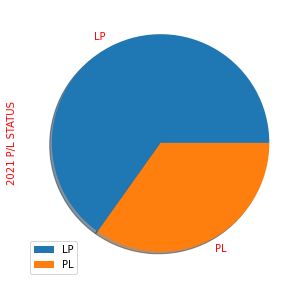

In [24]:
Merged_reports["P/L_STATUS_2021"].value_counts()
Merged_reports["P/L_STATUS_2021"].value_counts().plot(kind = "pie" ,textprops = dict(color ="r"), legend = True, shadow = True, figsize = (10,5))
plt.ylabel("2021 P/L STATUS", size = 10, c = 'r')


> <font color = "orange" size = 4 >No Company has incurred loss in 2020 and 2019</font>

<font size = "5" color = "Pink" face = "Times New Roman">**Top 10 Companies with Highest Average Revenue from 2019-2021**</font>

                                      REVENUE(₹ Cr)  PAT IN CRORES
COMPANY NAME                                                      
Reliance Industries Ltd.              563944.000000   44227.000000
Indian Oil Corporation Ltd.           463136.666667   12748.333333
Oil And Natural Gas Corporation Ltd.  384870.666667   20914.666667
State Bank of India                   361344.666667   15448.333333
Bharat Petroleum Corporation Ltd.     275594.000000    9392.000000
Tata Motors Ltd.                      274571.666667  -17970.666667
Hindustan Petroleum Corporation Ltd.  261539.666667    6663.333333
Rajesh Exports Ltd.                   209917.333333    1114.000000
Tata Consultancy Services Ltd.        159875.333333   32124.666667
Tata Steel Ltd.                       153155.000000    6654.333333


<AxesSubplot: xlabel='COMPANY NAME'>

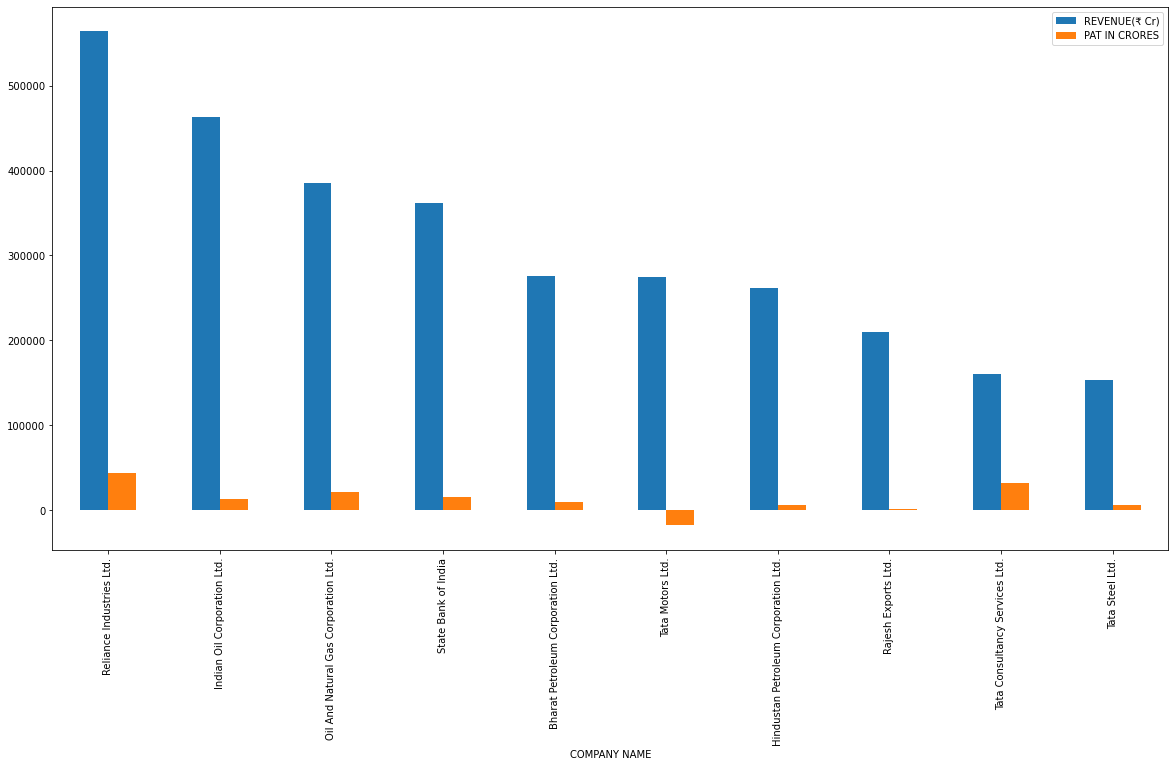

In [25]:
ET_aggregate = economic_times[economic_times["YEAR"] > 2018]
ET_top_10_revenue = ET_aggregate.pivot_table(index= ["COMPANY NAME"],aggfunc= np.mean, margins= True)[["REVENUE(₹ Cr)","PAT IN CRORES"]].nlargest(10,["REVENUE(₹ Cr)"])
print(ET_top_10_revenue)
ET_top_10_revenue.plot(kind= "bar", figsize = (20,10))

<font size = "5" color = "Pink" face = "Times New Roman">**Top 10 Companies with Highest Average PAT from 2019-2021**</font>

                                              REVENUE(₹ Cr)  PAT IN CRORES
COMPANY NAME                                                              
Reliance Industries Ltd.                      563944.000000   44227.000000
Tata Consultancy Services Ltd.                159875.333333   32124.666667
HDFC Bank Ltd.                                142353.333333   27147.000000
Oil And Natural Gas Corporation Ltd.          384870.666667   20914.666667
Housing Development Finance Corporation Ltd.  119039.333333   19384.000000
Infosys Ltd.                                   93941.333333   17140.333333
Coal India Ltd.                               116376.666667   15625.666667
State Bank of India                           361344.666667   15448.333333
ITC Ltd.                                       51484.333333   13760.000000
NTPC Ltd.                                     111402.666667   13069.666667


<AxesSubplot: xlabel='COMPANY NAME'>

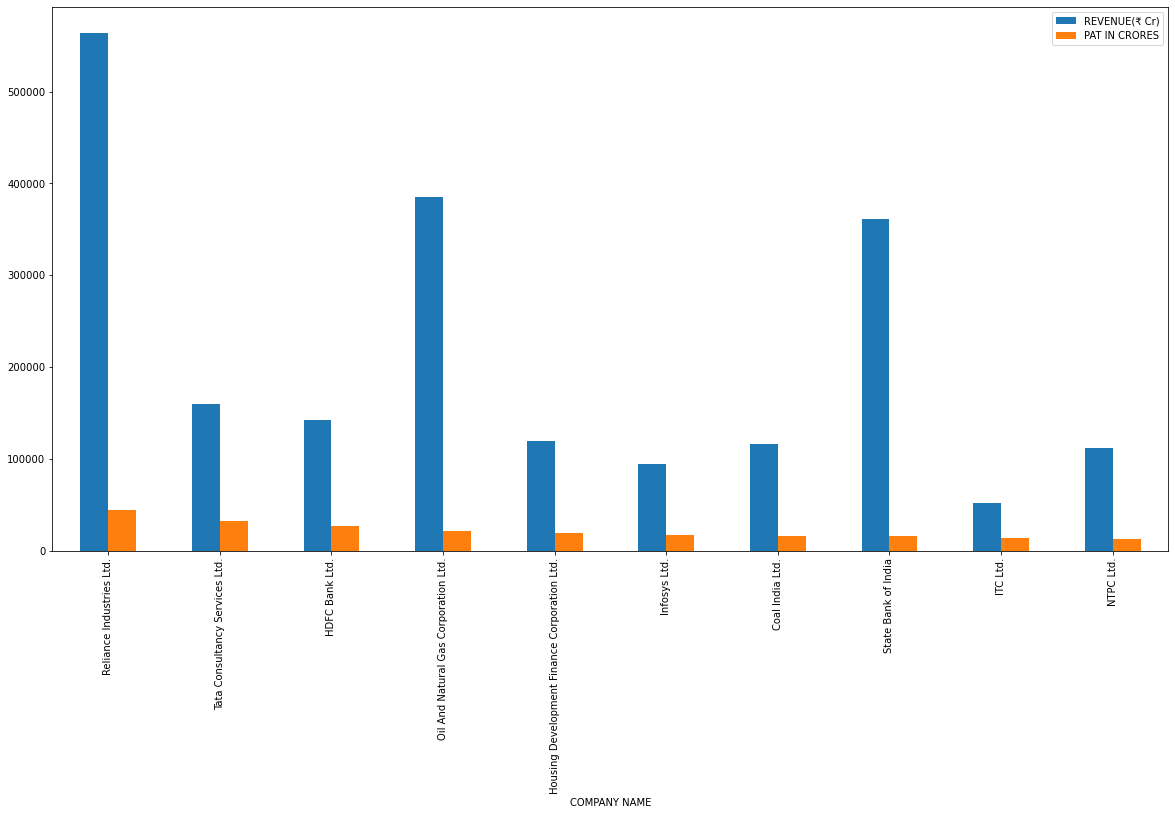

In [26]:
ET_top_10_PAT = ET_aggregate.pivot_table(index= ["COMPANY NAME"],aggfunc= np.mean, margins= True)[["REVENUE(₹ Cr)","PAT IN CRORES"]].nlargest(10,["PAT IN CRORES"])
print(ET_top_10_PAT)
ET_top_10_PAT.plot(kind= "bar", figsize = (20,10))

<font color = "orange" size = 5 >COMPANIES WHICH HAVE APPEARED IN THE TOP 10 HIGHEST AVERAGE REVENUE AND PAT</font>

1. <b>Reliance Industries Ltd.</b>

2. <b>Tata Consultancy Services Ltd.</b>

3. <b>Oil And Natural Gas Corporation Ltd.</b>
	
4. <b>State Bank of India</b>



<font size = "5" color = "Pink" face = "Times New Roman">**Number of Companies by Company Type**</font>

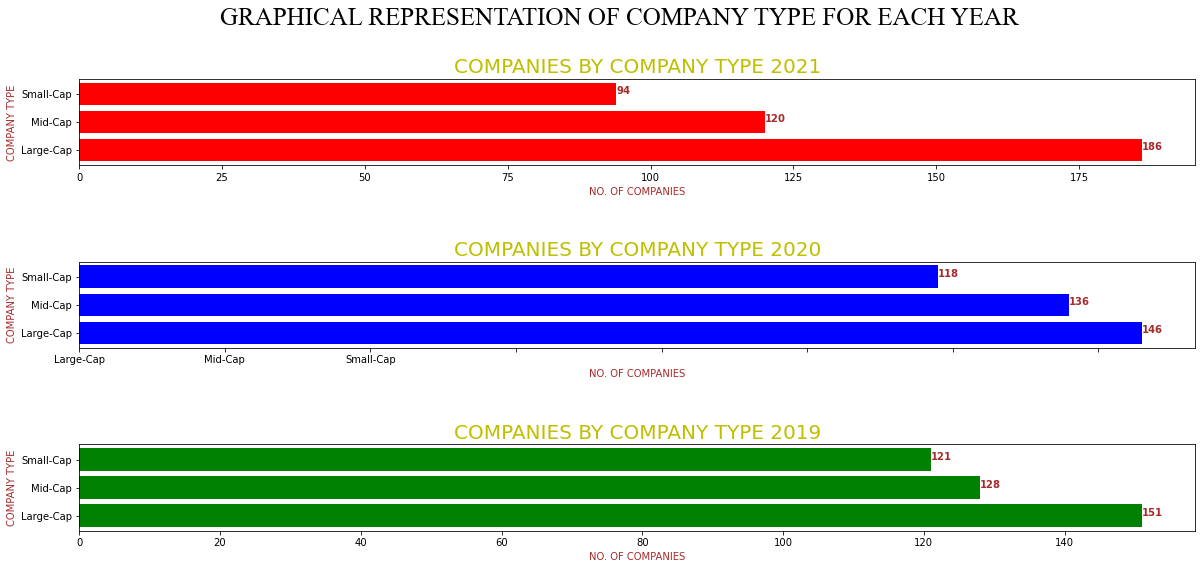

In [27]:
fig,ax = plt.subplots(1,3, figsize = (20,10), facecolor = "w")
font1 = {"family" : "Times New Roman", "color" : "k"}
fig.suptitle("GRAPHICAL REPRESENTATION OF COMPANY TYPE FOR EACH YEAR",fontdict = font1, fontsize = 25)

ax1 = plt.subplot2grid(shape = (18,4),loc = (0,0),colspan= 4, rowspan= 3)
ax2 = plt.subplot2grid(shape = (18,4),loc = (6,0),colspan= 4, rowspan= 3)
ax3 = plt.subplot2grid(shape = (18,4),loc = (12,0),colspan= 4, rowspan= 3)

ax1.barh(reports["ET_REPORT_2021"]["2021 COMPANY TYPE"].unique(),reports["ET_REPORT_2021"]["2021 COMPANY TYPE"].value_counts(), color = "r")
ax1.set_xlabel("NO. OF COMPANIES", fontsize = 10, c = "brown")
ax1.set_ylabel("COMPANY TYPE",fontsize = 10, c = "brown")
ax1.set_yticks(reports["ET_REPORT_2021"]["2021 COMPANY TYPE"].unique())
ax1.set_yticklabels(reports["ET_REPORT_2021"]["2021 COMPANY TYPE"].unique(), c= "k")
ax1.set_title("COMPANIES BY COMPANY TYPE 2021",fontsize = 20, c = "y")

for i, v in enumerate(reports["ET_REPORT_2021"]["2021 COMPANY TYPE"].value_counts()):
    ax1.text(v, i, str(f"{v}"),
            color = 'brown', fontweight = 'bold', fontsize = 10, ha = "left")

ax2.barh(reports["ET_REPORT_2020"]["2020 COMPANY TYPE"].unique(),reports["ET_REPORT_2020"]["2020 COMPANY TYPE"].value_counts(), color = "b")
ax2.set_xlabel("NO. OF COMPANIES", fontsize = 10, c = "brown")
ax2.set_ylabel("COMPANY TYPE",fontsize = 10, c = "brown")
ax2.set_yticks(reports["ET_REPORT_2020"]["2020 COMPANY TYPE"].unique())
ax2.set_yticklabels(reports["ET_REPORT_2020"]["2020 COMPANY TYPE"].unique(), c = "k")
ax2.set_xticklabels(reports["ET_REPORT_2020"]["2020 COMPANY TYPE"].unique())
ax2.set_title("COMPANIES BY COMPANY TYPE 2020",fontsize = 20, c = "y")

for i, v in enumerate(reports["ET_REPORT_2020"]["2020 COMPANY TYPE"].value_counts()):
    ax2.text(v, i, str(f"{v}"),
            color = 'brown', fontweight = 'bold', fontsize = 10, ha = "left")

ax3.barh(reports["ET_REPORT_2019"]["2019 COMPANY TYPE"].unique(),reports["ET_REPORT_2019"]["2019 COMPANY TYPE"].value_counts(), color = "g")
ax3.set_xlabel("NO. OF COMPANIES", fontsize = 10, c = "brown")
ax3.set_ylabel("COMPANY TYPE",fontsize = 10, c = "brown")
ax3.set_yticks(reports["ET_REPORT_2019"]["2019 COMPANY TYPE"].unique())
ax3.set_yticklabels(reports["ET_REPORT_2019"]["2019 COMPANY TYPE"].unique(), c = "k")
ax3.set_title("COMPANIES BY COMPANY TYPE 2019",fontsize = 20, c = "y")

for i, v in enumerate(reports["ET_REPORT_2019"]["2019 COMPANY TYPE"].value_counts()):
    ax3.text(v, i, str(f"{v}"),
            color = 'brown', fontweight = 'bold', fontsize = 10, ha = "left")


<font color = "orange" size = 5>KEY HIGHLIGHTS FROM THE ABOVE GRAPH</font>

1.  <b>Number of Large-Cap companies in 2020 fell by 3.42%</b>

2.  <b>Number of Large-Cap companies increased by 27.39% in 2021</b>


<font size = "5" color = "Pink" face = "Times New Roman">**Companies by Market Capitalisation**</font>